In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)


60000

In [4]:
len(X_test)


10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

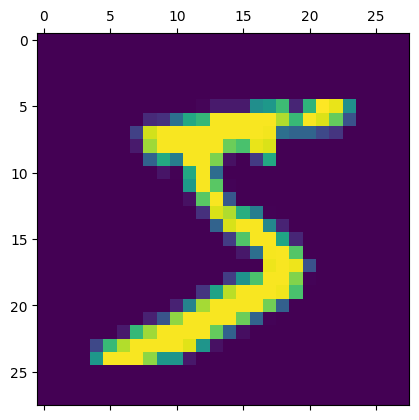

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

np.uint8(5)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train_flatted = X_train.reshape(len(X_train),28*28)
X_test_flatted = X_test.reshape(len(X_test),28*28)


In [14]:
X_train_flatted.shape

(60000, 784)

In [15]:
X_test_flatted.shape

(10000, 784)

In [110]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatted, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.8102 - loss: 0.7297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.9144 - loss: 0.3083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.9202 - loss: 0.2881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.9231 - loss: 0.2723
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.9275 - loss: 0.2615


In [111]:
model.evaluate(X_test_flatted,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9159 - loss: 0.3044


[0.2683197259902954, 0.9251999855041504]

In [113]:
y_predicted = model.predict(X_test_flatted)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step


array([3.2363087e-02, 4.7595023e-07, 4.8620950e-02, 9.5406395e-01,
       1.8077651e-03, 1.0342223e-01, 1.3945624e-06, 9.9978459e-01,
       7.4092120e-02, 5.8511853e-01], dtype=float32)

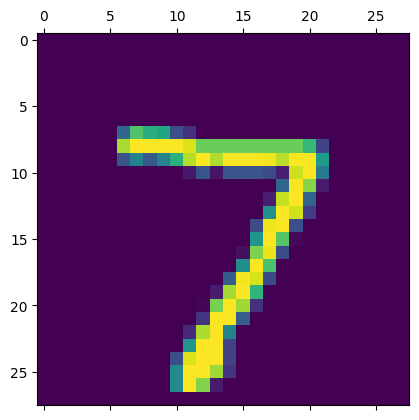

In [114]:
plt.matshow(X_test[0])

In [115]:
np.argmax(y_predicted[0])


np.int64(7)

In [116]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [117]:
y_predicted_labels[:5]


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [118]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    0,    5,    5,    3,    2,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,   12,  918,   17,    7,    4,   13,   12,   37,    5],
       [   4,    0,   13,  915,    0,   31,    3,   13,   24,    7],
       [   1,    1,    4,    2,  902,    0,   11,    6,   10,   45],
       [  10,    3,    2,   27,    7,  782,   16,    7,   31,    7],
       [  13,    3,    4,    1,    7,   12,  914,    2,    2,    0],
       [   1,    6,   21,    6,    4,    0,    0,  960,    1,   29],
       [   9,   15,    6,   18,    9,   23,    7,   13,  866,    8],
       [  11,    7,    1,   11,   22,    6,    0,   32,    4,  915]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

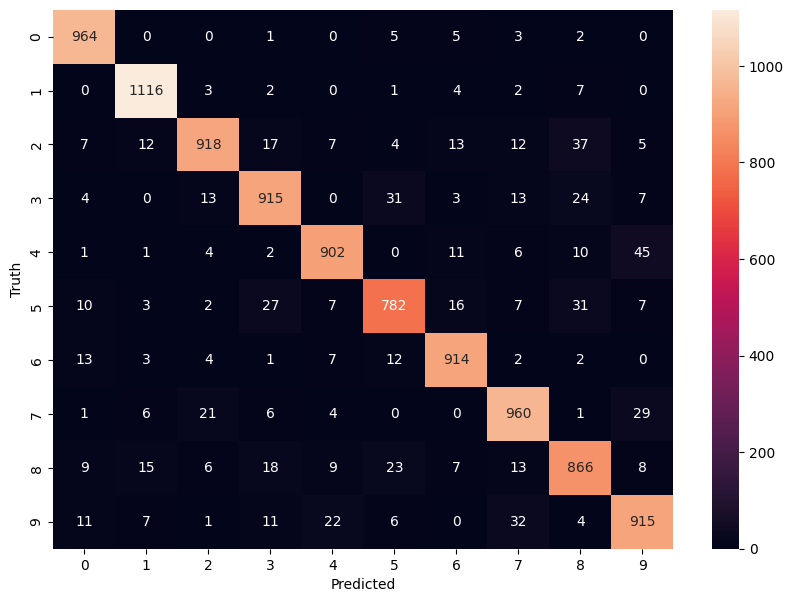

In [119]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [120]:

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatted, y_train, epochs=5)

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.8760 - loss: 0.4424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.9621 - loss: 0.1313
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.9738 - loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.9808 - loss: 0.0650
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.9848 - loss: 0.0513


In [121]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.8746 - loss: 0.4515
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.9620 - loss: 0.1300
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.9740 - loss: 0.0856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.9802 - loss: 0.0660
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.9856 - loss: 0.0479
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.9890 - loss: 0.0368
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9907 - loss: 0.0300
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.9939 - loss: 0.0227
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9933 - loss: 0.0215
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9955 - loss: 0.0162
